In [1]:
import numpy as np

# Load the .npz file
data = np.load('dataset_features.npz')

# List all arrays within the .npz file
print(data.files)

# Access individual arrays by their names
X_tr = data['trainset_features']
y_tr = data['trainset_labels']

X_val = data['validset_features']
y_val = data['validset_labels']

X_test = data['testset_features']
y_test = data['testset_labels']

class_labels = data['class_labels']

['trainset_features', 'validset_features', 'testset_features', 'trainset_labels', 'validset_labels', 'testset_labels', 'class_labels']


In [21]:
def decode_class(y):
    return np.argmax(y,axis=1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create the estimator
logreg = LogisticRegression(multi_class='multinomial', solver='saga', penalty='none')

# Fit it to train data
logreg.fit(X_tr, decode_class(y_tr))

# Accuracy on test set
accuracy = logreg.score(X_test, decode_class(y_test))
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.940


/home/miguel/miniconda3/envs/adsml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
coefficients = logreg.coef_ 

Find the indices of the top 5 largest coefficients (absolute values) for each class

In [ ]:
top_features = {}
for class_index, class_coefficients in enumerate(coefficients):
    # Get the indices of the top 5 largest coefficients for the current class
    largest_indices = np.argsort(-np.abs(class_coefficients))[:5]
    top_features[f"{class_labels[class_index]}"] = largest_indices

# Display the results in a tabular format
import pandas as pd
top_features_df = pd.DataFrame.from_dict(top_features, orient='index', columns=[f"Feature {i+1}" for i in range(5)])
print("\nTop 5 Largest Coefficients for Each Class (Feature Indices):")
print(top_features_df)


Top 5 Largest Coefficients for Each Class (Feature Indices):
            Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
bike              801        183        999        530       1094
car               291        871        861        183       1170
motorcycle       1122       1043       1058        505        898
other             411        734       1231        812        257
truck             580        378        794        555        100
van               138       1022        267       1172        765


Visualize the coefficients as a heatmap

Text(120.72222222222221, 0.5, 'Class Index')

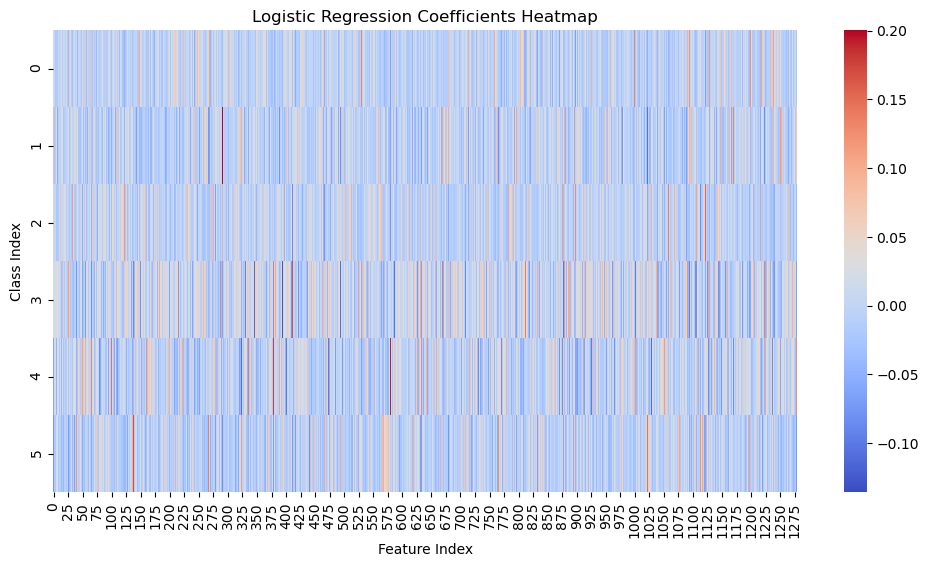

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(coefficients, cmap="coolwarm", annot=False, cbar=True)
plt.title("Logistic Regression Coefficients Heatmap")
plt.xlabel("Feature Index")
plt.ylabel("Class Index")